In [4]:
import numpy as np
import frigidum

from frigidum.examples import tsp

points = np.random.rand(100, 2)

tsp.nodes = points
tsp.nodes_count = points.shape[0]

z = np.array([[complex(*c) for c in points]])  # notice the [[ ... ]]
distance_matrix = abs(z.T-z)

tsp.dist_eu = distance_matrix

In [5]:
local_opt = frigidum.sa(
    random_start=tsp.random_start,
    objective_function=tsp.objective_function,
    neighbours=[
        tsp.euclidian_bomb_and_fix, 
        tsp.euclidian_nuke_and_fix,
        tsp.route_bomb_and_fix, 
        tsp.route_nuke_and_fix, 
        tsp.random_disconnect_vertices_and_fix
    ],
    copy_state=frigidum.annealing.naked,
    T_start=5,
    alpha=.8,
    T_stop=0.001,
    repeats=10**2,
    post_annealing=tsp.local_search_2opt
)

T: 0.001, M: 0.05, O_min:  8.1930, O_current:  8.1930: 100%|██████████| 39/39 [00:21<00:00,  1.82cooling/s]


---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.363519
   euclidian_nuke_and_fix           : 0.348745
   route_bomb_and_fix               : 0.361702
   route_nuke_and_fix               : 0.314214
   random_disconnect_vertices_and_  : 0.126225
---
(Local) Minimum Objective Value Found: 
   8.19302695


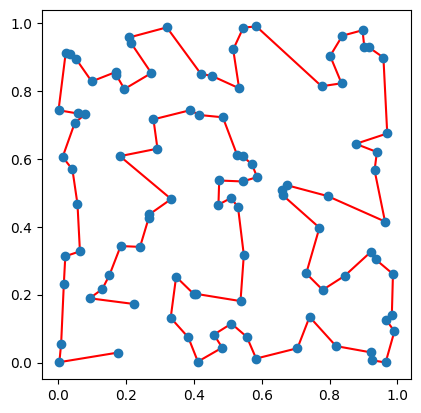

In [6]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1])

route = local_opt[0]
for a, b in zip(route[:-1], route[1:]):
    x = points[[a, b]].T[0]
    y = points[[a, b]].T[1]
    plt.plot(x, y, c='r', zorder=-1)
    
plt.gca().set_aspect('equal')